In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
main_df = pd.DataFrame()

dataset = "COVID-19-geographic-disbtribution-worldwide-2020-12-14 - w LOCKDOWN DATES.csv"

df = pd.read_csv(dataset, error_bad_lines=False)

# df.set_index("dateRep", inplace=True)
df = df[["dateRep", "cases", "deaths", "lockdown"]]

# converting the date to pandas date format
df["dateRep"]= pd.to_datetime(df["dateRep"])

df.head()

,dateRep,cases,deaths,lockdown
0,2020-12-14,18447.0,144.0,No
1,2020-12-13,21501.0,520.0,No
2,2020-12-12,21672.0,424.0,No
3,2020-12-11,20964.0,516.0,No
4,2020-12-10,16578.0,533.0,No


In [3]:
df.isnull().sum()

dateRep     0
cases       0
deaths      0
lockdown    0
dtype: int64

In [4]:
corr=df.corr()

<AxesSubplot:>

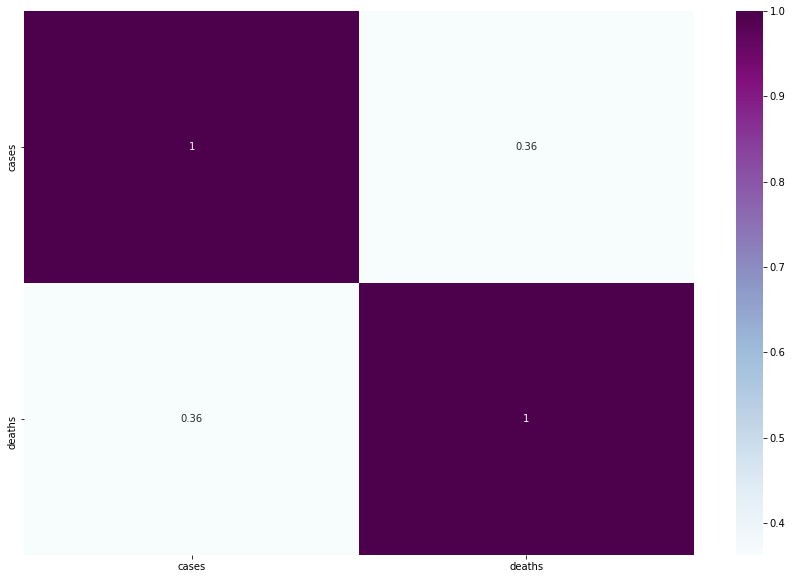

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [6]:
X = df[['cases', 'deaths']]
y = df[['lockdown']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is: ', model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)
    print('Cross validation Accuaracy: ', np.mean(score)*100)

In [11]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C = 1)
classify(clf, X,y.values.ravel())

Accuracy is:  92.85714285714286
Cross validation Accuaracy:  81.42857142857143


In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
classify(clf, X,y.values.ravel())

Accuracy is:  91.42857142857143
Cross validation Accuaracy:  80.0


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
classify(knn,X,y.values.ravel())

Accuracy is:  92.85714285714286
Cross validation Accuaracy:  83.71428571428572


### Confusion Matrix


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [15]:
clf = SVC(kernel='linear', C = 1)

In [16]:
clf.fit(x_train,y_train.values.ravel())

SVC(C=1, kernel='linear')

In [17]:
y_pred = clf.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

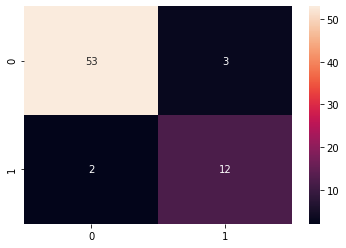

In [19]:
sns.heatmap(cm,annot=True)

In [20]:
df.value_counts('lockdown')

lockdown
No     251
Yes     99
dtype: int64